**Importing Required Libraries**

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set visual styles
sns.set(style="whitegrid")
plt.style.use("default")  # Use the default Matplotlib style


**Loading Dataset**

In [6]:
# File paths (using raw string literals to avoid path issues)
train_path = r"E:\Github\ML_Projects\House Price Predictor\Data\raw\train.csv"
test_path = r"E:\Github\ML_Projects\House Price Predictor\Data\raw\test.csv"

# Load datasets
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

# Display the shape of the datasets
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")


Train shape: (1460, 81)
Test shape: (1459, 80)


**Inspecting Dataset**

In [7]:
# Display basic information
print("Train dataset info:")
train.info()

print("\nTrain dataset preview:")
display(train.head())

print("\nTest dataset preview:")
display(test.head())


Train dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   i

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



Test dataset preview:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


**Describing Numerical Features**

In [10]:
# Summarize numerical features
print("Summary statistics for numerical columns:")
display(train.describe())


Summary statistics for numerical columns:


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Checking Missing Values**

In [12]:
# Check missing values in train and test datasets
missing_train = train.isnull().sum().sort_values(ascending=False)
missing_test = test.isnull().sum().sort_values(ascending=False)

print("Missing values in train dataset:")
display(missing_train[missing_train > 0])

print("\nMissing values in test dataset:")
display(missing_test[missing_test > 0])


Missing values in train dataset:


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


Missing values in test dataset:


PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageCond        78
GarageFinish      78
GarageQual        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
Exterior1st        1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
SaleType           1
KitchenQual        1
GarageCars         1
GarageArea         1
Exterior2nd        1
dtype: int64

***Handling Missing Values***

**Dropping Columns With Large Missing Values**

In [13]:
# Drop columns with too many missing values (more than 50% missing)
columns_to_drop = [
    "PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"
]

train.drop(columns=columns_to_drop, axis=1, inplace=True)
test.drop(columns=columns_to_drop, axis=1, inplace=True)


**Filling Missing Values for Categorical Features**

In [14]:
# Fill missing values for categorical features with mode or 'None' for features without the attribute
categorical_columns = [
    "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", 
    "BsmtFinType2", "GarageType", "GarageFinish", "GarageQual", "GarageCond", 
    "PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"
]

for column in categorical_columns:
    if column in train.columns:
        train[column].fillna(train[column].mode()[0], inplace=True)
    if column in test.columns:
        test[column].fillna(test[column].mode()[0], inplace=True)

# For missing values in columns related to the absence of features (like basements or garages),
# we may choose to fill with "None" or "No Basement"/"No Garage" for clearer interpretation.
train['BsmtQual'].fillna('No Basement', inplace=True)
test['BsmtQual'].fillna('No Basement', inplace=True)
train['GarageQual'].fillna('No Garage', inplace=True)
test['GarageQual'].fillna('No Garage', inplace=True)


C:\Users\awais\AppData\Local\Temp\ipykernel_7404\3943070333.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[column].fillna(train[column].mode()[0], inplace=True)
C:\Users\awais\AppData\Local\Temp\ipykernel_7404\3943070333.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

**Filling Missing Values for Numerical Features**

In [ ]:
# Fill missing numerical values with the median (preferred to avoid outliers)
numerical_columns = [
    "LotFrontage", "MasVnrArea", "GarageYrBlt", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "GarageArea", "GarageCars"
]

for column in numerical_columns:
    if column in train.columns:
        train[column].fillna(train[column].median(), inplace=True)
    if column in test.columns:
        test[column].fillna(test[column].median(), inplace=True)


train['Electrical'].fillna(train['Electrical'].mode()[0], inplace=True)
test['Electrical'].fillna(test['Electrical'].mode()[0], inplace=True)


C:\Users\awais\AppData\Local\Temp\ipykernel_7404\1127721396.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[column].fillna(train[column].median(), inplace=True)
C:\Users\awais\AppData\Local\Temp\ipykernel_7404\1127721396.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

**Verifying Missing Values**

In [16]:
# Check missing values after imputation
missing_train_after = train.isnull().sum().sort_values(ascending=False)
missing_test_after = test.isnull().sum().sort_values(ascending=False)

print("Missing values in train dataset after imputation:")
display(missing_train_after[missing_train_after > 0])

print("\nMissing values in test dataset after imputation:")
display(missing_test_after[missing_test_after > 0])


Missing values in train dataset after imputation:


Series([], dtype: int64)


Missing values in test dataset after imputation:


MSZoning        4
Utilities       2
BsmtHalfBath    2
Functional      2
BsmtFullBath    2
Exterior2nd     1
KitchenQual     1
Exterior1st     1
SaleType        1
dtype: int64

**Handling Remaining Missing Values**

In [18]:
# Handle remaining categorical columns with small numbers of missing values
remaining_categorical_columns = [
    "MSZoning", "Utilities", "BsmtHalfBath", "Functional", "BsmtFullBath",
    "Exterior2nd", "KitchenQual", "Exterior1st", "SaleType"
]

for column in remaining_categorical_columns:
    if column in train.columns:
        # Fill with mode (most frequent value)
        train[column].fillna(train[column].mode()[0], inplace=True)
    if column in test.columns:
        test[column].fillna(test[column].mode()[0], inplace=True)

# Check missing values after handling these columns
missing_train_after = train.isnull().sum().sort_values(ascending=False)
missing_test_after = test.isnull().sum().sort_values(ascending=False)



C:\Users\awais\AppData\Local\Temp\ipykernel_7404\3033526902.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[column].fillna(train[column].mode()[0], inplace=True)
C:\Users\awais\AppData\Local\Temp\ipykernel_7404\3033526902.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

**Checking Again for Missing Values**

In [19]:
print("Missing values in train dataset after imputation:")
display(missing_train_after[missing_train_after > 0])

print("\nMissing values in test dataset after imputation:")
display(missing_test_after[missing_test_after > 0])


Missing values in train dataset after imputation:


Series([], dtype: int64)


Missing values in test dataset after imputation:


Series([], dtype: int64)

**Visualize Target Variables**

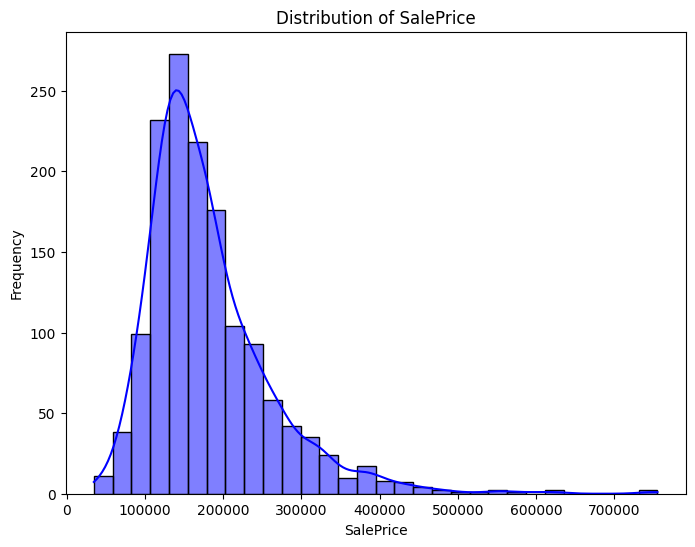

In [20]:
# Distribution of SalePrice (target variable)
plt.figure(figsize=(8, 6))
sns.histplot(train["SalePrice"], kde=True, bins=30, color="blue")
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()


**Correlation with Target**

In [24]:
# Select numerical columns only
numerical_cols = train.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix for numerical columns only
correlation = train[numerical_cols].corr()

# Top correlations with SalePrice
top_corr = correlation["SalePrice"].sort_values(ascending=False)

print("Top correlations with SalePrice:")
display(top_corr.head(10))


Top correlations with SalePrice:


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

**Visualize Key Correlations**

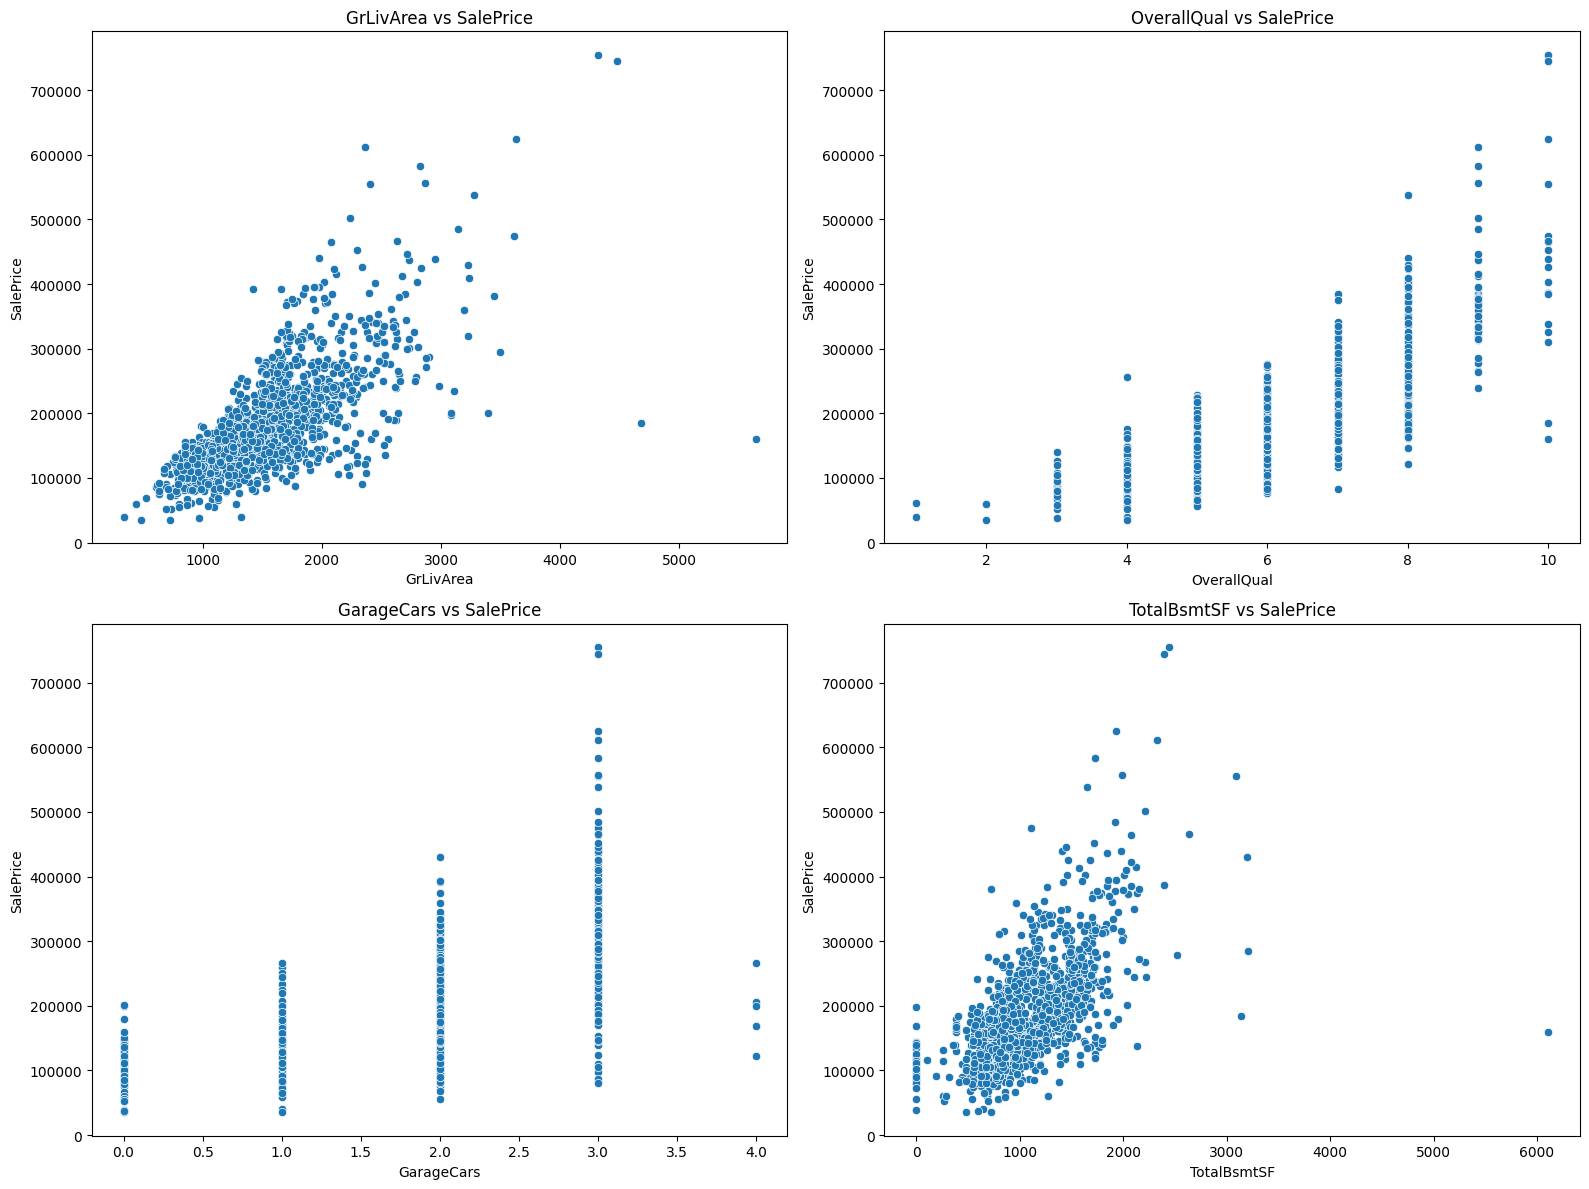

In [25]:
# Visualize top correlated features
top_features = ["GrLivArea", "OverallQual", "GarageCars", "TotalBsmtSF"]
plt.figure(figsize=(16, 12))

for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=train[feature], y=train["SalePrice"])
    plt.title(f"{feature} vs SalePrice")
    plt.xlabel(feature)
    plt.ylabel("SalePrice")

plt.tight_layout()
plt.show()


**Analyse Categorical Features**

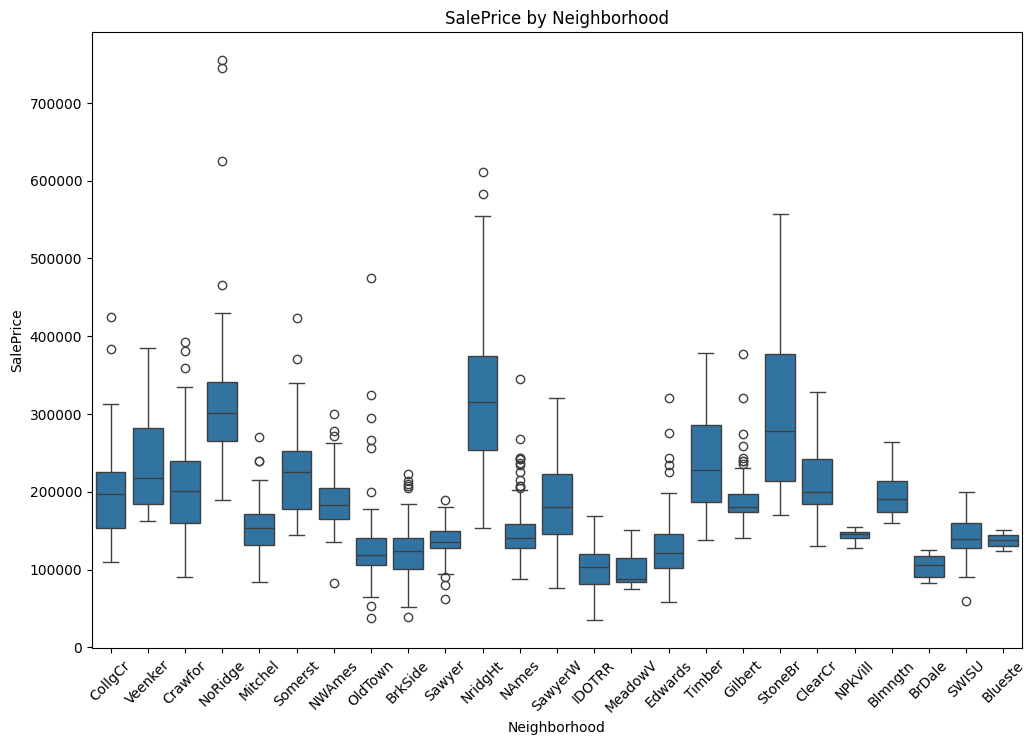

In [26]:
# Boxplot for Neighborhood (example categorical feature)
plt.figure(figsize=(12, 8))
sns.boxplot(data=train, x="Neighborhood", y="SalePrice")
plt.title("SalePrice by Neighborhood")
plt.xticks(rotation=45)
plt.show()
